### Read Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("house_data_MLR.csv")
df.head()

,Size (sqft),Number of Bedrooms,Number of Floors,Age of Home,Price (1000s dollars)
0,2104,5,1,45,460
1,1416,3,2,40,232
2,852,2,1,35,178


### Make Prediction of Equation

In [3]:
import numpy as np

In [4]:
x1 = np.array([2104, 1416, 852])
x2 = np.array([5, 3, 2])
x3 = np.array([1, 2, 3])
x4 = np.array([45, 40, 35])
x = np.array([x1,x2,x3,x4])
y = np.array([460,232,178])
w = np.array([1, 2, -1, 2])  # It is assumed initial weights
b = 700 # It is assumed initial weights

In [5]:
def predict_y(w,x,b):
    y_pred = np.dot(w,x)+b
    return y_pred

In [6]:
y_pred = predict_y(w,x,b)
print(y_pred)

[2903 2200 1623]


### Cost Function

In [7]:
def calculate_cost(y,y_pred):
    m = len(y)
    diff = np.subtract(y_pred,y)
    sqr_diff = np.square(diff)
    j = (1/(2*m)) * np.sum(sqr_diff)
    return j

In [8]:
cost = calculate_cost(y,y_pred)
print(cost)

1988216.3333333333


### Calculate Gradient

In [9]:
def calculate_gradient(x,y,y_pred):
    m = len(y)
    diff = np.subtract(y_pred,y)
    dj_dw = (1/m) * np.dot(diff,x.T)
    dj_db = (1/m) * np.sum(diff)
    return dj_dw,dj_db

In [10]:
dj_dw,dj_db = calculate_gradient(x,y,y_pred)
print("Gradient of Cost w.r.t 'w' : ",dj_dw)
print("Gradient of Cost w.r.t 'b' : ",dj_db)

Gradient of Cost w.r.t 'w' :  [3052633.33333333    7003.            3571.33333333   79743.33333333]
Gradient of Cost w.r.t 'b' :  1952.0


### Update Weights

### Gradient Decent Algorithm

In [11]:
def optimize_weights(w,x,b,y,iter):
    dj_dw = np.zeros(4)
    dj_db = 0
    alpha = 5.0e-7
    w_all = np.zeros((iter,4))
    b_all = np.zeros(iter)
    j_all = np.zeros(iter)
        
    for i in range(0,iter):
        w = w - (alpha * dj_dw)
        b = b - (alpha * dj_db)
        y_pred = predict_y(w,x,b)
        j = calculate_cost(y,y_pred)
        dj_dw, dj_db = calculate_gradient(x,y,y_pred)
        print(f"Iteration {i}: w = {w}, b = {b:.4f}, Cost = {j:.4f}")
        #print(f"dj_dw = {dj_dw},dj_db = {dj_db}")
        w_all[i,] = w
        b_all[i] = b
        j_all[i] = j
    
    return w_all,b_all,j_all 

In [12]:
b = 0
w = np.zeros(4)
#w = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
x1 = np.array([2104, 1416, 852])
x2 = np.array([5,3,2])
x3 = np.array([1,2,1])
x4 = np.array([45,40,35])
x = np.vstack((x1,x2,x3,x4))
y = np.array([460,232,178])
m = len(y)
iter = 1000

In [13]:
#w1_all,w2_all,w3_all,w4_all,b_all,j_all = optimize_weights(m,w,x,b,y,iter)
w_all,b_all,j_all = optimize_weights(w,x,b,y,iter)

Iteration 0: w = [0. 0. 0. 0.], b = 0.0000, Cost = 49518.0000
Iteration 1: w = [2.41334667e-01 5.58666667e-04 1.83666667e-04 6.03500000e-03], b = 0.0001, Cost = 2529.4630
Iteration 2: w = [1.94582073e-01 4.54367630e-04 1.34363401e-04 4.77918168e-03], b = 0.0001, Cost = 765.8337
Iteration 3: w = [2.03641847e-01 4.78507728e-04 1.30194588e-04 4.93584845e-03], b = 0.0001, Cost = 699.6290
Iteration 4: w = [2.01888855e-01 4.77764738e-04 1.17281885e-04 4.81887235e-03], b = 0.0001, Cost = 697.1337
Iteration 5: w = [2.02230666e-01 4.81842427e-04 1.06063372e-04 4.75491412e-03], b = 0.0001, Cost = 697.0297
Iteration 6: w = [2.02166641e-01 4.84986158e-04 9.45168343e-05 4.68068839e-03], b = 0.0001, Cost = 697.0153
Iteration 7: w = [2.02181240e-01 4.88310801e-04 8.30340450e-05 4.60845570e-03], b = 0.0001, Cost = 697.0044
Iteration 8: w = [2.02180608e-01 4.91600367e-04 7.15391041e-05 4.53584076e-03], b = 0.0001, Cost = 696.9935
Iteration 9: w = [2.02182926e-01 4.94896701e-04 6.00467159e-05 4.46330374

In [14]:
min_value = np.min(j_all) # Finding the minimum value
min_index = np.argmin(j_all) # Finding the position (index) of the minimum value
cost = j_all[min_index]
w = w_all[min_index]
b = b_all[min_index]
print(f"Optimize value of w = {w}, b = {b}, with Cost = {cost}")

Optimize value of w = [ 0.20396393  0.00374592 -0.01123737 -0.065792  ], b = -0.002233104020377104, with Cost = 686.7133402763525


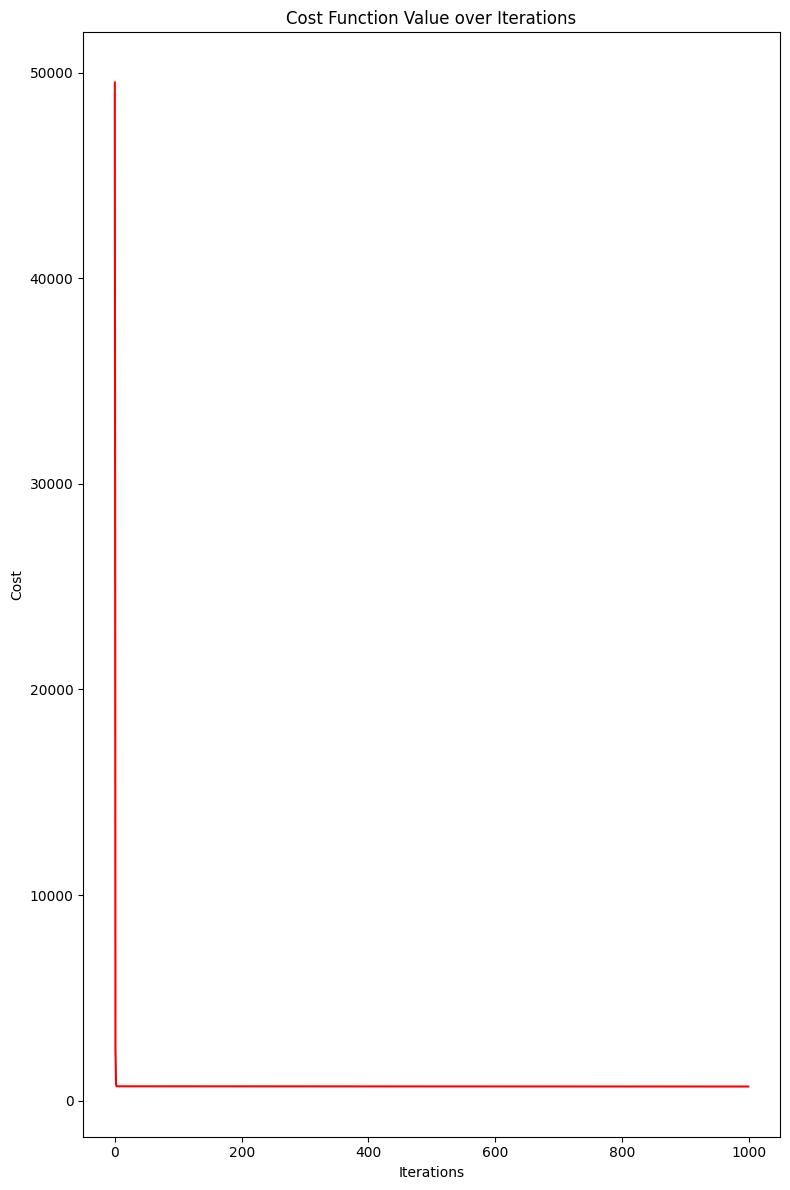

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting the weight values over iterations
plt.figure(figsize=(8, 12))

# Plot for cost_all
#plt.subplot(3, 1, 3)
plt.plot(j_all, color='red')
plt.title('Cost Function Value over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')

# Adjust the layout and show the plots
plt.tight_layout()
plt.show()

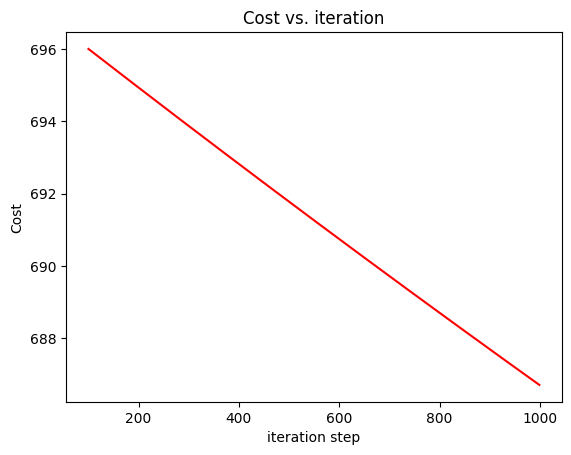

In [16]:
plt.plot(100 + np.arange(len(j_all[100:])), j_all[100:],color='red')
plt.title("Cost vs. iteration") 
plt.ylabel('Cost')              
plt.xlabel('iteration step')   
plt.show()